<a href="https://colab.research.google.com/github/rajattiwari010/DensNet_Model_Customized/blob/MY-REPO's/Dense_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.densenet import DenseNet201
from tensorflow.keras.utils import to_categorical

# Define the paths to your dataset directories
benign_dir = r'/content/drive/MyDrive/Dataset/Untitled folder/New His dataset/Benign'
malignant_dir = r'/content/drive/MyDrive/Dataset/Untitled folder/New His dataset/Melignant'

# Load and preprocess the data
image_size = (32, 32)

image_files = []
labels = []

# Load images and map subfolder names to class labels
class_mapping = {
    'tubula_adenoma': 0,
    'phyllodes_tumor': 1,
    'fibroadenoma': 2,
    'adenosis': 3,
    'papillary_carcinoma': 4,
    'mucinous_carcinoma': 5,
    'lobular_carcinoma': 6,
    'ductal_carcinoma': 7
}

for root_dir, _, filenames in os.walk(benign_dir):
    for filename in filenames:
        if filename.endswith('.png'):
            image_path = os.path.join(root_dir, filename)
            image_files.append(image_path)
            class_name = os.path.basename(root_dir)
            labels.append(class_mapping[class_name])

for root_dir, _, filenames in os.walk(malignant_dir):
    for filename in filenames:
        if filename.endswith('.png'):
            image_path = os.path.join(root_dir, filename)
            image_files.append(image_path)
            class_name = os.path.basename(root_dir)
            labels.append(class_mapping[class_name])

# Ensure that there are samples for both classes
if len(image_files) == 0:
    raise ValueError("No image files found in the specified directories.")

# Split the data into a training (70%) and testing (30%) set
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.3, random_state=42)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=8)
y_test = to_categorical(y_test, num_classes=8)

# Create TensorFlow datasets for training and testing with one-hot encoded labels
batch_size = 32

def preprocess_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, image_size)
    img = tf.keras.applications.densenet.preprocess_input(img)
    return img

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(lambda x, y: (preprocess_image(x), y))
train_dataset = train_dataset.shuffle(buffer_size=len(X_train)).batch(batch_size)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.map(lambda x, y: (preprocess_image(x), y))
test_dataset = test_dataset.batch(batch_size)

# Define the model architecture for multi-class classification
num_classes = 8  # 8 classes now
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.7)(x)
predictions = Dense(num_classes, activation='softmax')(x)  # Softmax activation for multi-class
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
model.fit(train_dataset, validation_data=test_dataset, epochs=epochs)


Epoch 1/10
29/29 [==============================] - 25s 348ms/step - loss: 2.4221 - accuracy: 0.1645 - val_loss: 1.9794 - val_accuracy: 0.2594
Epoch 2/10
29/29 [==============================] - 14s 258ms/step - loss: 2.1495 - accuracy: 0.2262 - val_loss: 1.8134 - val_accuracy: 0.3275
Epoch 3/10
29/29 [==============================] - 14s 280ms/step - loss: 1.9479 - accuracy: 0.3019 - val_loss: 1.7405 - val_accuracy: 0.3753
Epoch 4/10
29/29 [==============================] - 14s 232ms/step - loss: 1.7904 - accuracy: 0.3258 - val_loss: 1.6612 - val_accuracy: 0.4181
Epoch 5/10
29/29 [==============================] - 15s 321ms/step - loss: 1.7460 - accuracy: 0.3885 - val_loss: 1.6217 - val_accuracy: 0.4559
Epoch 6/10
29/29 [==============================] - 14s 240ms/step - loss: 1.6402 - accuracy: 0.3918 - val_loss: 1.5631 - val_accuracy: 0.4584
Epoch 7/10
29/29 [==============================] - 14s 292ms/step - loss: 1.5957 - accuracy: 0.3994 - val_loss: 1.5459 - val_accuracy: 0.4710

In [ ]:
# model layers
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_7 (InputLayer)        [(None, 32, 32, 3)]          0         []                            
                                                                                                  
 zero_padding2d_12 (ZeroPad  (None, 38, 38, 3)            0         ['input_7[0][0]']             
 ding2D)                                                                                          
                                                                                                  
 conv1/conv (Conv2D)         (None, 16, 16, 64)           9408      ['zero_padding2d_12[0][0]']   
                                                                                                  
 conv1/bn (BatchNormalizati  (None, 16, 16, 64)           256       ['conv1/conv[0][0]']    

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.47441 to fit



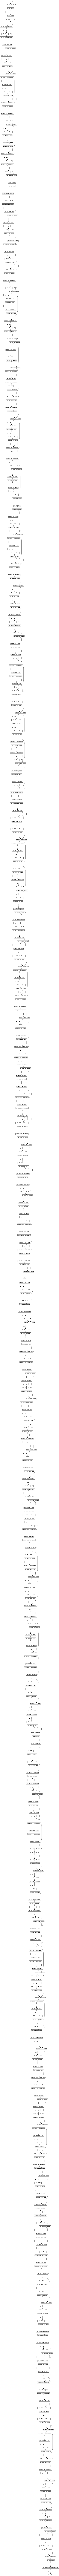

In [ ]:
#flowchart of model
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
#Train the model
epochs = 10
model.fit(train_dataset, validation_data=test_dataset, epochs=epochs)


Epoch 1/10
29/29 [==============================] - 15s 272ms/step - loss: 1.4701 - accuracy: 0.4697 - val_loss: 1.4572 - val_accuracy: 0.5164
Epoch 2/10
29/29 [==============================] - 14s 235ms/step - loss: 1.4155 - accuracy: 0.4881 - val_loss: 1.4608 - val_accuracy: 0.4887
Epoch 3/10
29/29 [==============================] - 15s 290ms/step - loss: 1.3992 - accuracy: 0.5043 - val_loss: 1.4501 - val_accuracy: 0.5013
Epoch 4/10
29/29 [==============================] - 14s 233ms/step - loss: 1.3958 - accuracy: 0.5108 - val_loss: 1.4423 - val_accuracy: 0.4987
Epoch 5/10
29/29 [==============================] - 14s 249ms/step - loss: 1.3506 - accuracy: 0.5032 - val_loss: 1.4190 - val_accuracy: 0.4987
Epoch 6/10
29/29 [==============================] - 14s 279ms/step - loss: 1.3485 - accuracy: 0.5119 - val_loss: 1.4183 - val_accuracy: 0.4987
Epoch 7/10
29/29 [==============================] - 14s 275ms/step - loss: 1.3519 - accuracy: 0.4978 - val_loss: 1.4213 - val_accuracy: 0.4962

In [ ]:
# # To use Support Vector Machines (SVM) with a pre-trained DenseNet201 model for binary classification on the same dataset, you can extract features from the pre-trained model and then train an SVM classifier on those features. Here's how you can do it:

# # python
# # Copy code
# import os
# import tensorflow as tf
# from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.models import Model
# from sklearn.model_selection import train_test_split
# from tensorflow.keras.applications.densenet import DenseNet201
# from sklearn import svm
# from sklearn.metrics import accuracy_score, classification_report

# # Rest of your code for loading and preprocessing data

# # Define the model architecture and extract features
# base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(image_size[0], image_size[1], 3))
# base_model.trainable = False

# # Create a new model that outputs features
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# feature_model = Model(inputs=base_model.input, outputs=x)

# # Extract features for training and testing data
# X_train_features = feature_model.predict(train_dataset.map(lambda x, y: x))
# X_test_features = feature_model.predict(test_dataset.map(lambda x, y: x))

# # Train an SVM classifier
# svm_classifier = svm.SVC(kernel='linear')  # You can experiment with different kernels
# svm_classifier.fit(X_train_features, y_train)

# # Make predictions on the test set
# y_pred = svm_classifier.predict(X_test_features)

# # Evaluate the SVM classifier
# accuracy = accuracy_score(y_test, y_pred)
# report = classification_report(y_test, y_pred)

# print(f"Accuracy: {accuracy}")
# print(report)

In [ ]:
#testing
loss, acc = model.evaluate(test_dataset)
print("loss: ",loss)
print("accuracy: ",acc)

13/13 [==============================] - 4s 277ms/step - loss: 1.4012 - accuracy: 0.5013
loss:  1.401239275932312
accuracy:  0.501259446144104


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Preprocess the test dataset
X_test_preprocessed = [preprocess_image(image_path) for image_path in X_test]

# Convert the list of preprocessed images to a numpy array
X_test_preprocessed = np.array(X_test_preprocessed)

# Predict probabilities
y_pred_prob = model.predict(X_test_preprocessed)

# Convert probabilities to binary predictions using a threshold of 0.5
y_pred = (y_pred_prob > 0.5).astype(int)

print('Accuracy on Test Data: %2.2f%%' % (accuracy_score(y_test, y_pred)))
print(classification_report(y_test, y_pred))



13/13 [==============================] - 4s 142ms/step
Accuracy on Test Data: 0.22%
              precision    recall  f1-score   support

           0       0.60      0.07      0.12        46
           1       1.00      0.06      0.11        51
           2       0.40      0.05      0.09        39
           3       0.67      0.22      0.33        27
           4       0.33      0.07      0.12        40
           5       0.56      0.23      0.33        60
           6       1.00      0.12      0.21        51
           7       0.89      0.61      0.73        83

   micro avg       0.74      0.22      0.34       397
   macro avg       0.68      0.18      0.26       397
weighted avg       0.72      0.22      0.30       397
 samples avg       0.22      0.22      0.22       397



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# X_test_preprocessed = np.array(X_test_preprocessed)  # Convert X_test_preprocessed to a numpy array

# sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, cmap=plt.cm.Blues, vmax=X_test_preprocessed.shape[0] // 16)


In [ ]:
model_save_path = '/content/drive/MyDrive/Dataset/model Folder 1'

# Save the model to the specified path
model.save(model_save_path)

print("Model saved successfully to:", model_save_path)


Model saved successfully to: /content/drive/MyDrive/Dataset/model Folder 1


In [ ]:
# saved_model_dir = '/content/drive/MyDrive/Dataset/model Folder 1'

# # Load the SavedModel
# loaded_model = tf.saved_model.load(saved_model_dir)

In [ ]:
# import tensorflow as tf

# # Load the SavedModel
# loaded_model = tf.saved_model.load(saved_model_dir)

# # Convert the SavedModel to an HDF5 (`.h5`) model
# model_h5 = tf.keras.models.load_model(saved_model_dir)

# # Specify the path where you want to save the HDF5 model
# h5_model_save_path = '/content/drive/MyDrive/Colab Notebooks/model'

# # Save the model in HDF5 format
# model_h5.save(h5_model_save_path)

# print("Model saved successfully as an HDF5 file.")

Model saved successfully as an HDF5 file.
